# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [7]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [8]:
cars_df=pd.read_csv('auto-mpg.data',sep='\s+')
cars_df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
print cars_df.head(10)


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  15.0          8         350.0      165.0  3693.0          11.5          70   
1  18.0          8         318.0      150.0  3436.0          11.0          70   
2  16.0          8         304.0      150.0  3433.0          12.0          70   
3  17.0          8         302.0      140.0  3449.0          10.5          70   
4  15.0          8         429.0      198.0  4341.0          10.0          70   
5  14.0          8         454.0      220.0  4354.0           9.0          70   
6  14.0          8         440.0      215.0  4312.0           8.5          70   
7  14.0          8         455.0      225.0  4425.0          10.0          70   
8  15.0          8         390.0      190.0  3850.0           8.5          70   
9  15.0          8         383.0      170.0  3563.0          10.0          70   

   origin             car name  
0       1    buick skylark 320  
1       1   plymouth satellite  
2       1

In [9]:
# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [10]:
cars_df.info()
cars_df.shape
cars_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null float64
acceleration    397 non-null float64
model year      397 non-null int64
origin          397 non-null int64
car name        397 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [11]:
cars_df.replace('?',np.NaN)
#cars_df.fillna( cars_df.median(),inplace=True)

imp = Imputer(missing_values='NaN', strategy='median', axis=1)
imp.fit(cars_df) 

NameError: name 'Imputer' is not defined

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

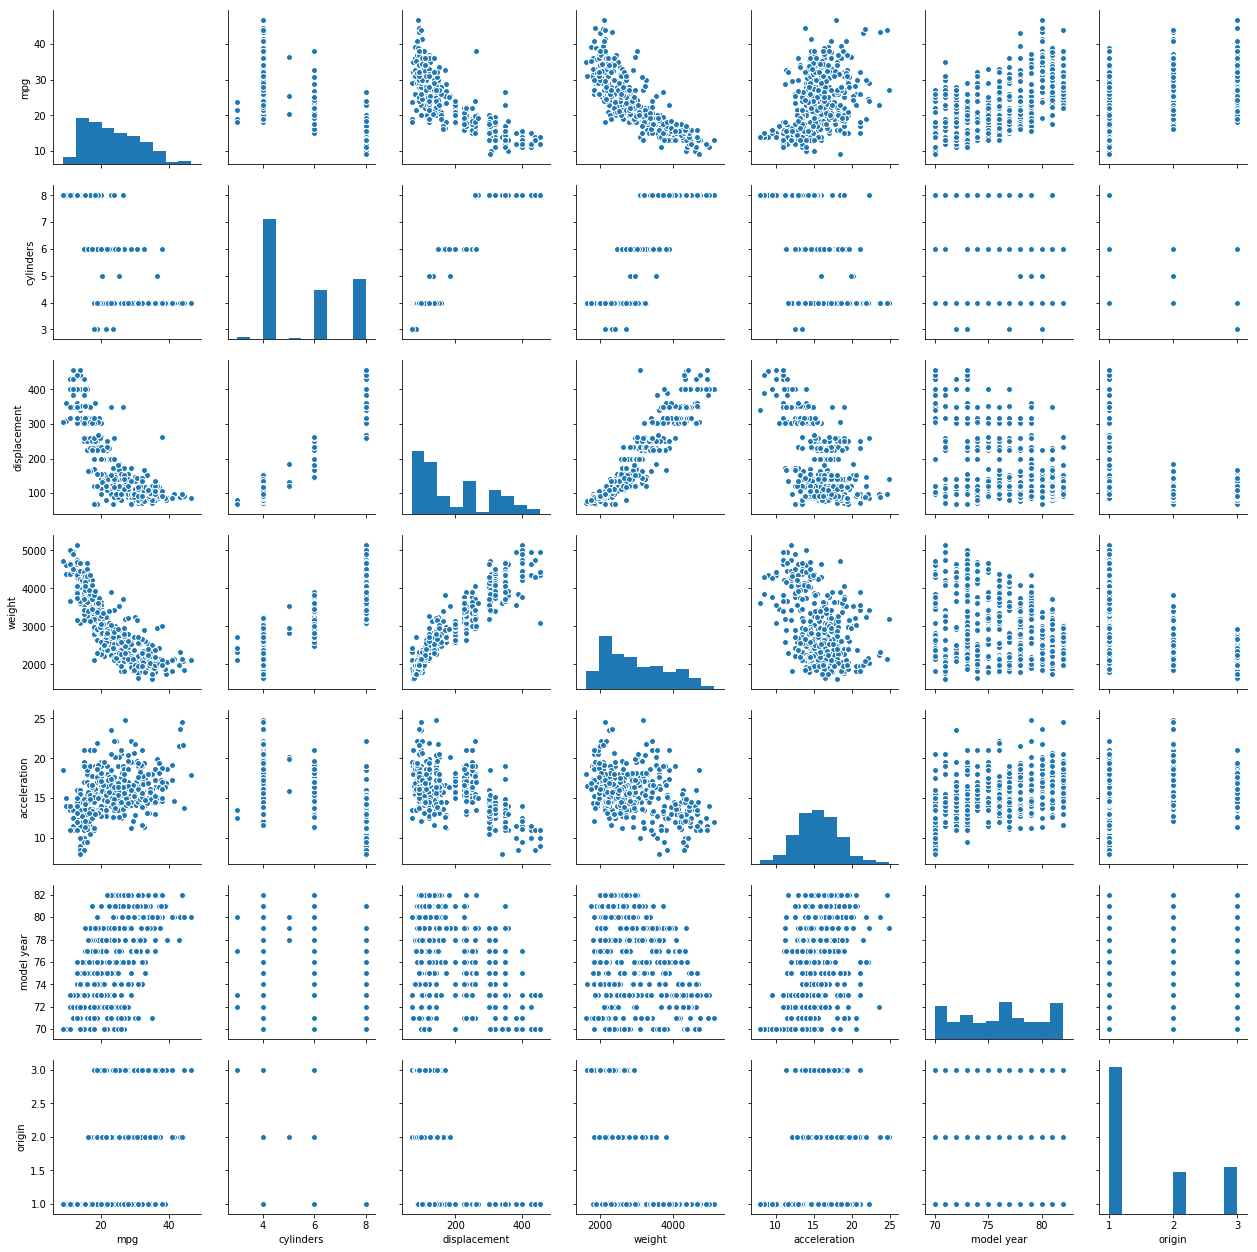

In [12]:
cars_df.corr()   # do not see any +ve or -ve correlation
sns.pairplot(cars_df)  #do not see any meaningful assocation between data

In [13]:
#Observations


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [14]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

cars_df['age']=83-cars_df['model year']

cars_df['horsepower'] = cars_df['horsepower'].apply(pd.to_numeric, errors='coerce')
print cars_df

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    15.0          8         350.0       165.0  3693.0          11.5   
1    18.0          8         318.0       150.0  3436.0          11.0   
2    16.0          8         304.0       150.0  3433.0          12.0   
3    17.0          8         302.0       140.0  3449.0          10.5   
4    15.0          8         429.0       198.0  4341.0          10.0   
5    14.0          8         454.0       220.0  4354.0           9.0   
6    14.0          8         440.0       215.0  4312.0           8.5   
7    14.0          8         455.0       225.0  4425.0          10.0   
8    15.0          8         390.0       190.0  3850.0           8.5   
9    15.0          8         383.0       170.0  3563.0          10.0   
10   14.0          8         340.0       160.0  3609.0           8.0   
11   15.0          8         400.0       150.0  3761.0           9.5   
12   14.0          8         455.0       225.0  3086.0          

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [15]:
#cars_df['car name'].drop
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

#group_column=cars_df['car name']
group_column='car name'
def replace(group, stds):
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group


cars_df.loc[:, cars_df.columns != group_column] = cars_df.groupby(group_column).transform(lambda g: replace(g, 3))

#print cars_df
    

C:\Users\RB00001\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RB00001\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RB00001\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._whe

# Q7. Create appropriate clusters with the new data set

<function matplotlib.pyplot.scatter>

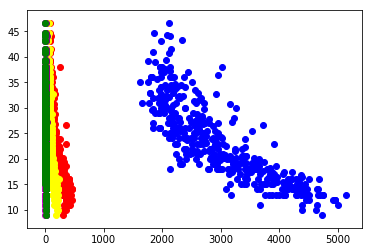

In [22]:

f1 = cars_df['mpg'].values
f2 = cars_df['cylinders'].values
f3 = cars_df['displacement'].values
f4 = cars_df['horsepower'].values
f5 = cars_df['weight'].values
f6 = cars_df['acceleration'].values
f7 = cars_df['origin'].values
f8 = cars_df['age'].values
#plt.scatter(f1, f2,f3, c='blue')
#plt.scatter
#plt.scatter(f4, f5,f6, c='black')
#plt.scatter
plt.scatter(f2, f1, c='black')
plt.scatter
plt.scatter(f3, f1, c='red')
plt.scatter
plt.scatter(f4, f1, c='yellow')
plt.scatter
plt.scatter(f5, f1, c='blue')
plt.scatter
plt.scatter(f6, f1, c='purple')
plt.scatter
plt.scatter(f7, f1, c='m')
plt.scatter
plt.scatter(f8, f1, c='g')
plt.scatter




# Q8. Identify the appropriate clusters with result from above question

In [ ]:
# could see 4 different clusters green,yellow, red and blue mapping to 'age', horsepower, displacement and weight

# Q9. Check for no of values in each cluster and centers for each variables. 

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [96]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [97]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups